In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

Load the dataset & Setting up the plotting style

In [2]:
data_path = Path("dataset/train.csv")
df = pd.read_csv(data_path)

plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Exploratory Data Analysis - Ames Housing Dataset', fontsize=16, fontweight='bold')

plt.close(fig) # To prevent empty plot display

1. Seaborn Pair Plot for key features

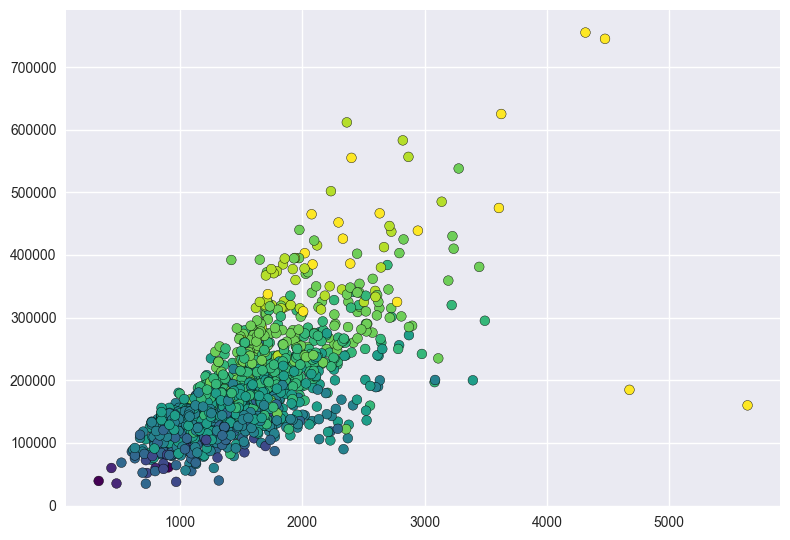

In [3]:
key_features = ['GrLivArea', 'OverallQual', 'SalePrice']
ax1 = axes[0, 0]
scatter = ax1.scatter(df['GrLivArea'], df['SalePrice'],c=df['OverallQual'], 
                      cmap='viridis', edgecolors='black')
# To show the plot below
plt.scatter(df['GrLivArea'], df['SalePrice'], c=df['OverallQual'], 
            cmap='viridis', edgecolors='black')
ax1.set_xlabel('Above Grade Living Area (sq ft)', fontweight='bold')
ax1.set_ylabel('Sale Price ($)', fontweight='bold')
ax1.set_title('Relationship: Living Area vs Sale Price\n(Color = Overall Quality)', 
              fontweight='bold', pad=20)
cbar = fig.colorbar(scatter, ax=ax1)
cbar.set_label('Overall Quality (1-10)', fontweight='bold')

plt.tight_layout()
plt.show()

2. Correlation Heatmap for all numerical features

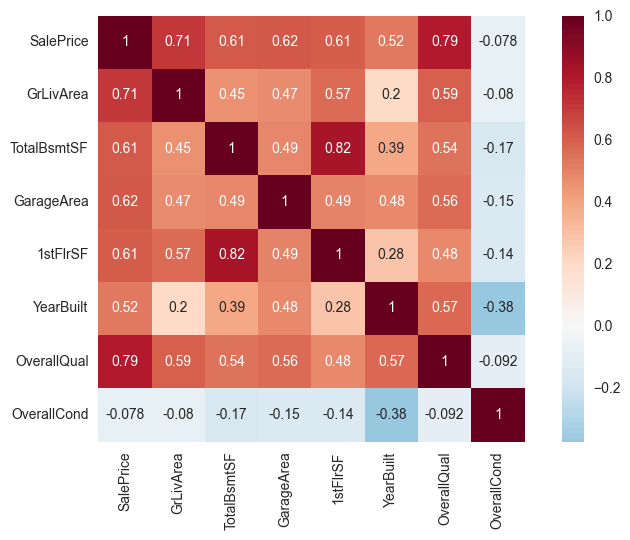

In [4]:
ax2 = axes[0, 1]
numerical_cols = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 
                  '1stFlrSF', 'YearBuilt', 'OverallQual', 'OverallCond']
corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, square=True, ax=ax2)
# To show the plot below
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, square=True)

ax2.set_title('Correlation Matrix of Numerical Features', fontweight='bold')

plt.tight_layout()
plt.show()

3. Violin Plot: SalePrice distribution across HouseStyle categories  
Filter to most common house styles for better visualization

C:\Users\Sunjeet\AppData\Local\Temp\ipykernel_17712\2592845219.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='HouseStyle', y='SalePrice',
C:\Users\Sunjeet\AppData\Local\Temp\ipykernel_17712\2592845219.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='HouseStyle', y='SalePrice',


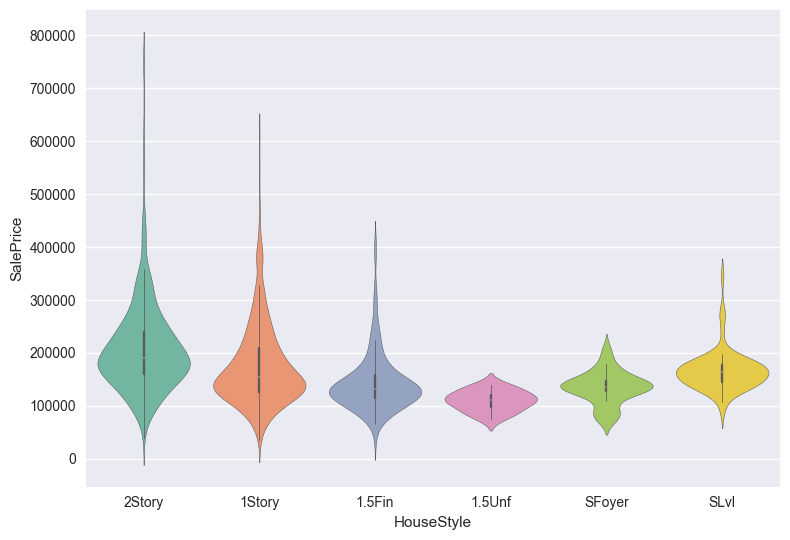

In [5]:
ax3 = axes[1, 0]
common_house_styles = df['HouseStyle'].value_counts().head(6).index
df_filtered = df[df['HouseStyle'].isin(common_house_styles)]

sns.violinplot(data=df_filtered, x='HouseStyle', y='SalePrice',
               inner='box',palette='Set2',ax=ax3)
# To show the plot below
sns.violinplot(data=df_filtered, x='HouseStyle', y='SalePrice', 
               inner='box',palette='Set2')
ax3.set_xlabel('House Style (Nominal Feature)', fontweight='bold')
ax3.set_ylabel('Sale Price - Target Variable ($)', fontweight='bold')
ax3.set_title('Distribution of Sale Price by House Style\n(Violin Plot)', 
              fontweight='bold', pad=20)
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

4. Additional Violin Plot: SalePrice by Neighborhood (top neighborhoods)

C:\Users\Sunjeet\AppData\Local\Temp\ipykernel_17712\550925628.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_neighborhoods, x='Neighborhood', y='SalePrice',
C:\Users\Sunjeet\AppData\Local\Temp\ipykernel_17712\550925628.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_neighborhoods, x='Neighborhood', y='SalePrice',


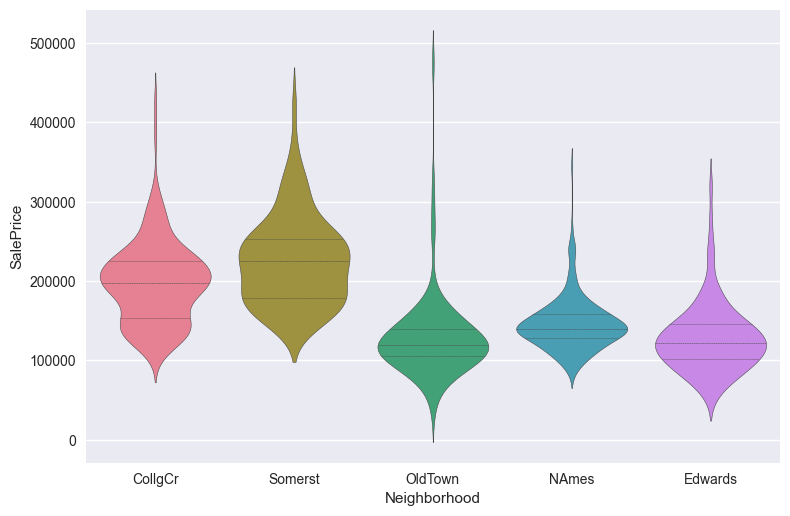

In [6]:
ax4 = axes[1, 1]
top_neighborhoods = df['Neighborhood'].value_counts().head(5).index
df_neighborhoods = df[df['Neighborhood'].isin(top_neighborhoods)]

sns.violinplot(data=df_neighborhoods, x='Neighborhood', y='SalePrice',
               inner='quartile',palette='husl',ax=ax4)
# To show the plot below
sns.violinplot(data=df_neighborhoods, x='Neighborhood', y='SalePrice',
               inner='quartile',palette='husl')
ax4.set_xlabel('Neighborhood (Nominal Feature)', fontweight='bold')
ax4.set_ylabel('Sale Price - Target Variable ($)', fontweight='bold')
ax4.set_title('Distribution of Sale Price by Neighborhood\n(Violin Plot)', 
              fontweight='bold', pad=20)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

Creating a separate a proper pair plot for the key features

<Figure size 1200x1000 with 0 Axes>

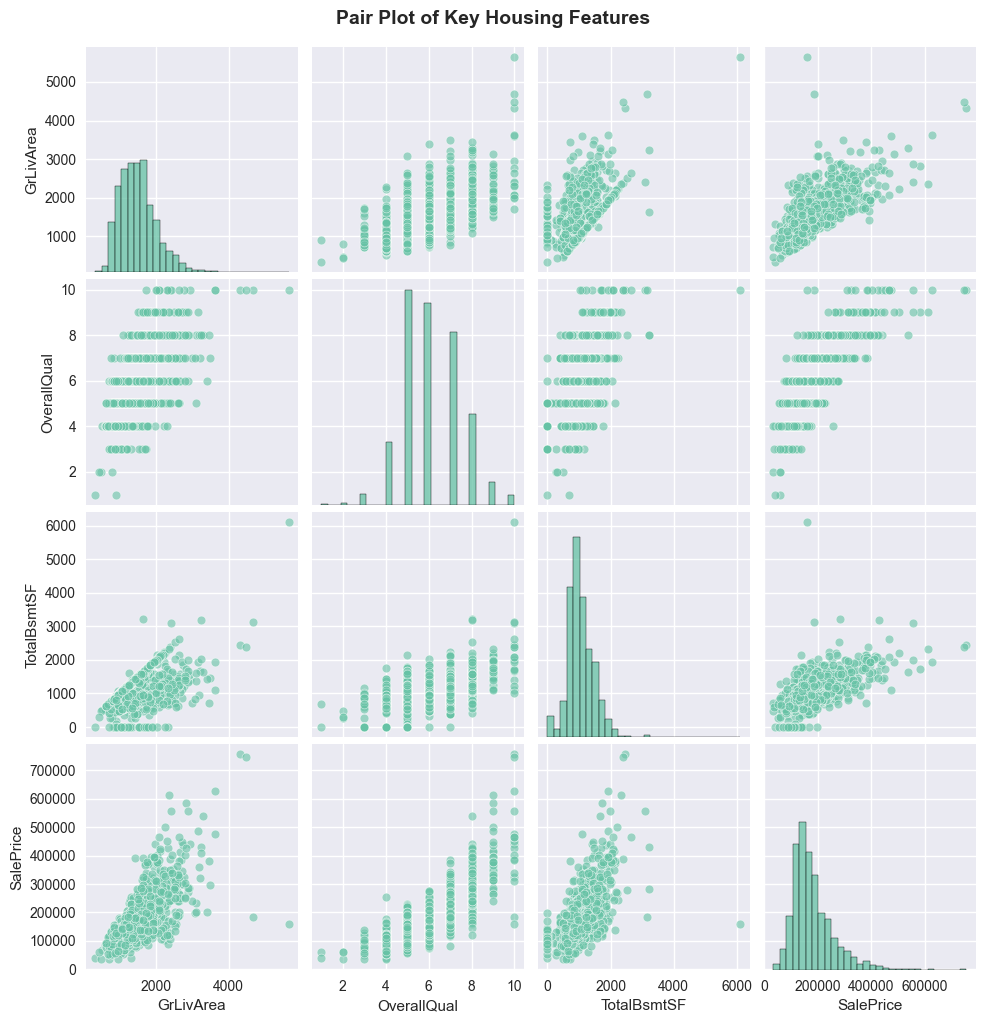

In [12]:
plt.figure(figsize=(12, 10))
pair_features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'SalePrice']
g = sns.pairplot(df[pair_features], diag_kind='hist',plot_kws={'alpha': 0.6, 's': 40},diag_kws={'bins': 30})
g.figure.suptitle('Pair Plot of Key Housing Features', y=1.02, fontsize=14, fontweight='bold')
plt.show()

All Plots

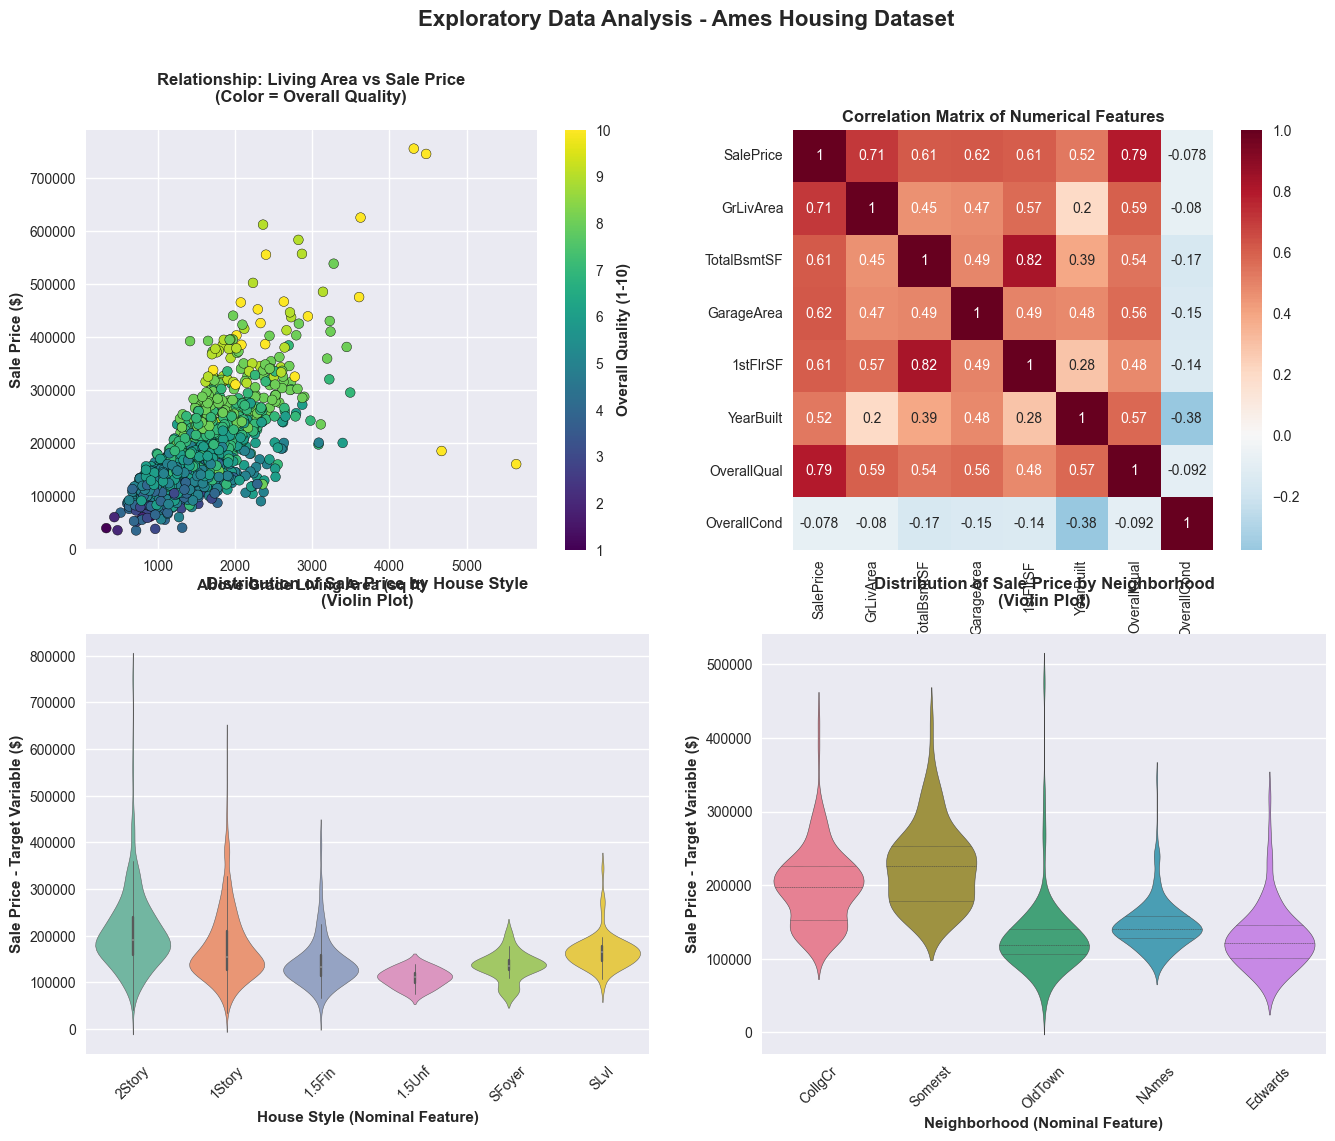

In [ ]:
fig

Print insights

In [ ]:
print("=== EXPLORATORY DATA ANALYSIS INSIGHTS ===")
print(f"Dataset contains {df.shape[0]} houses with {df.shape[1]} features")
print(f"Average house price: ${df['SalePrice'].mean():,.0f}")
print(f"Price standard deviation: ${df['SalePrice'].std():,.0f}")

print("\n=== TOP CORRELATIONS WITH SALE PRICE ===")
numerical_features = df.select_dtypes(include=[np.number]).columns
correlations = df[numerical_features].corr()['SalePrice'].sort_values(ascending=False)
for i, (feature, corr) in enumerate(correlations.items()):
    if feature != 'SalePrice' and i <= 5:
        print(f"{feature}: {corr:.3f}")

print("\n=== HOUSE STYLE DISTRIBUTION ===")
style_stats = df.groupby('HouseStyle')['SalePrice'].agg(['count', 'mean', 'std']).round(0)
print(style_stats.head())

print("\n=== NEIGHBORHOOD PRICE ANALYSIS ===")
neighborhood_stats = df.groupby('Neighborhood')['SalePrice'].agg(['count', 'mean']).sort_values('mean', ascending=False)
print(neighborhood_stats.head())

=== EXPLORATORY DATA ANALYSIS INSIGHTS ===
Dataset contains 1460 houses with 81 features
Average house price: $180,921
Price standard deviation: $79,443

=== TOP CORRELATIONS WITH SALE PRICE ===
OverallQual: 0.791
GrLivArea: 0.709
GarageCars: 0.640
GarageArea: 0.623
TotalBsmtSF: 0.614

=== HOUSE STYLE DISTRIBUTION ===
            count      mean       std
HouseStyle                           
1.5Fin        154  143117.0   54278.0
1.5Unf         14  110150.0   19036.0
1Story        726  175985.0   77056.0
2.5Fin          8  220000.0  118212.0
2.5Unf         11  157355.0   63934.0

=== NEIGHBORHOOD PRICE ANALYSIS ===
              count           mean
Neighborhood                      
NoRidge          41  335295.317073
NridgHt          77  316270.623377
StoneBr          25  310499.000000
Timber           38  242247.447368
Veenker          11  238772.727273
